# Dynamic Averaging with SVD and Loss Results

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)

%matplotlib inline

## Helpers

In [110]:
def performance_pivot(df, query, value, columns=None, xlabel=None):
    avg_piv = (
        df.query(query + ' and AGG_MODE == 1 and COMM_PERIOD > 1')
        .pivot_table(values=value, index="N_WORKERS", columns=['COMM_PERIOD'])
    )
    piv = (
        df.query(query + ' and AGG_MODE == 1 and COMM_PERIOD < 2')
        .pivot_table(values=value, index="N_WORKERS", columns=['COMM_MODE'])
    )
    merged = pd.concat([piv, avg_piv], axis=1)
    if columns is not None:
        merged.columns = columns
    if xlabel is not None:
        merged.index.name = xlabel
    
    return merged

In [111]:
columns = [
    r'FedAvg, $\rho=1$', r'DynAvg SVD', r'DynAvgLoss', r'FedAvg, $\rho=10$',
    r'FedAvg, $\rho=20$', r'FedAvg, $\rho=50$', r'FedAvg, $\rho=100$'
]
xlabel = 'No. of clients'

## Performance analysis for DynAvg SVD and DynAvg Loss

### Mnist

In [112]:
mnist_fed = pd.read_csv("../data/output/mnist-pkt-size.csv")
# mnist_avg = pd.read_csv("../data/output/mnist-avg.csv")

In [113]:
mnist_fed.head()

,N_WORKERS,COMM_PERIOD,AGG_MODE,COMM_MODE,NONIID,UNBALANCED,TIME,ACCURACY,PKT_SIZE
0,16,1,0,0,0,0,53.428523,90.52,44.968
1,16,1,0,0,0,1,56.661802,90.55,44.968
2,16,1,0,0,1,0,62.546713,87.87,44.968
3,16,1,0,0,1,1,80.243772,79.60,44.968
4,16,1,0,1,0,0,48.823966,90.28,18.707


In [114]:
# mnist_avg.head()

#### IID and balanced

##### Time

In [130]:
ib_query = 'NONIID == 0 and UNBALANCED == 0'
t_ib_merged = performance_pivot(mnist_fed, ib_query, 'TIME', columns=columns, xlabel=xlabel)
t_ib_merged

,"FedAvg, $\rho=1$",DynAvg SVD,DynAvgLoss,"FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
No. of clients,,,,,,,
8,80.815287,81.006431,80.554017,67.467648,67.877507,66.717027,67.274951
16,57.127120,50.133118,50.448137,40.679561,40.095585,38.484602,38.897185
32,46.617638,39.494684,45.936536,26.629159,24.917492,22.994617,23.790363
64,39.708639,39.152623,46.155075,17.988827,16.177416,16.039742,14.793734


##### Accuracy

In [131]:
acc_ib_merged = performance_pivot(mnist_fed, ib_query, 'ACCURACY', columns=columns, xlabel=xlabel)
acc_ib_merged

,"FedAvg, $\rho=1$",DynAvg SVD,DynAvgLoss,"FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
No. of clients,,,,,,,
8,91.26,91.00,90.79,91.26,91.28,91.28,91.30
16,90.52,90.27,90.24,90.57,90.52,90.47,90.41
32,89.58,89.58,89.65,89.56,89.53,89.49,89.39
64,88.44,88.41,88.56,88.43,88.40,88.26,88.02


In [117]:
# ax = acc_ib_merged_piv.plot(figsize=(12, 8))
# ax.set_ylabel('Wall time (s)', fontdict=dict(fontsize=12))
# ax.set_xlabel('No. of workers', fontdict=dict(fontsize=12))

#### Non-IID and Balanced

In [118]:
nb_query = 'NONIID == 1 and UNBALANCED == 0'

###### Time

In [119]:
t_nb_merged = performance_pivot(mnist_fed, nb_query, 'TIME', columns=columns, xlabel=xlabel)
t_nb_merged

,"FedAvg, $\rho=1$",DynAvg SVD,DynAvgLoss,"FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
No. of clients,,,,,,,
8,80.813955,79.796200,80.704801,68.998640,66.873468,67.162615,67.016227
16,63.911056,51.603631,49.382810,41.087607,39.429280,38.862249,38.962291
32,37.923562,35.079787,39.503238,26.635280,24.091703,23.186415,23.802081
64,35.043184,34.964721,43.898079,17.644944,16.244311,15.406458,48.790727


##### Accuracy

In [120]:
acc_nb_merged = performance_pivot(mnist_fed, nb_query, 'ACCURACY', columns=columns, xlabel=xlabel)
acc_nb_merged

,"FedAvg, $\rho=1$",DynAvg SVD,DynAvgLoss,"FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
No. of clients,,,,,,,
8,88.89,67.75,69.66,72.78,63.32,52.69,50.80
16,87.87,87.76,69.17,76.31,68.81,55.76,46.47
32,88.41,86.52,65.27,82.60,80.53,76.47,68.50
64,87.73,86.57,86.09,80.81,77.24,71.00,63.09


#### Non-IID and Unbalanced

##### Time

In [121]:
nu_query = 'NONIID == 1 and UNBALANCED == 1'

In [122]:
t_nu_merged = performance_pivot(mnist_fed, nu_query, 'TIME', columns=columns, xlabel=xlabel)
t_nu_merged

,"FedAvg, $\rho=1$",DynAvg SVD,DynAvgLoss,"FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
No. of clients,,,,,,,
8,83.918575,89.366349,77.941389,64.637299,65.949049,64.045047,63.523250
16,76.451873,53.918258,54.606935,46.058805,43.968491,41.448274,43.581599
32,52.112128,44.123158,43.330673,26.435445,23.364160,29.924172,24.822497
64,42.112207,40.629391,37.873993,21.755096,17.321541,17.275344,19.430286


##### Accuracy

In [123]:
acc_nu_merged = performance_pivot(mnist_fed, nu_query, 'ACCURACY', columns=columns, xlabel=xlabel)
acc_nu_merged

,"FedAvg, $\rho=1$",DynAvg SVD,DynAvgLoss,"FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
No. of clients,,,,,,,
8,82.53,87.21,77.23,73.14,67.72,54.65,45.85
16,79.60,82.65,64.16,59.57,51.56,46.21,43.63
32,84.98,86.38,81.93,58.76,47.93,34.36,30.22
64,87.39,87.04,84.51,76.86,66.10,53.33,42.50


#### IID and Unbalanced

##### Time

In [124]:
iu_query = 'NONIID == 0 and UNBALANCED == 1'

In [126]:
t_iu_merged = performance_pivot(mnist_fed, iu_query, 'TIME', columns=columns, xlabel=xlabel)
t_iu_merged

,"FedAvg, $\rho=1$",DynAvg SVD,DynAvgLoss,"FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
No. of clients,,,,,,,
8,82.719007,79.507657,80.846795,66.094950,64.454745,63.644001,63.234179
16,75.666846,66.726292,50.744187,38.287164,38.795892,45.194709,45.536603
32,53.883996,45.876370,40.715818,29.250908,23.857448,26.774717,25.520680
64,50.203086,41.957112,39.643586,20.539847,16.655902,24.111764,18.162108


##### Accuracy

In [127]:
acc_iu_merged = performance_pivot(mnist_fed, iu_query, 'ACCURACY', columns=columns, xlabel=xlabel)
acc_iu_merged

,"FedAvg, $\rho=1$",DynAvg SVD,DynAvgLoss,"FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
No. of clients,,,,,,,
8,91.25,91.39,91.47,91.32,91.24,91.13,90.96
16,90.55,90.86,89.00,90.53,90.47,90.39,90.06
32,89.57,90.02,89.06,89.54,89.53,89.45,89.18
64,88.61,88.97,88.00,88.52,88.47,88.25,87.80


### Wall time analysis

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True, sharex=True)
# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# IID and Balanced
t_ib_merged.plot(ax=axes[0, 0])
# axes[0, 0].set_ylabel('Wall time (s)', fontdict=dict(fontsize=12))
axes[0, 0].set_title('IID and Balanced')

# Non IID and Balanced
t_nb_merged.plot(ax=axes[0, 1])
axes[0, 1].set_title('Non-IID and Balanced')

# IID and Unbalanced
t_iu_merged.plot(ax=axes[1, 0])
axes[1, 0].set_title('IID and Unbalanced')
axes[1, 0].set_xlabel('')

# Non IID and Unbalanced
t_nu_merged.plot(ax=axes[1, 1])
axes[1, 1].set_title('Non-IID and Unbalanced')
axes[1, 1].set_xlabel('')

plt.ylabel('Wall time (s)', fontdict=dict(fontsize=12))
plt.xlabel('No. of clients', fontdict=dict(fontsize=12))
plt.suptitle('Wall time analysis for MNIST', fontsize=16)
plt.savefig('../reports/figures/time-analysis.png', dpi=500, format='png')

### Accuracy analysis

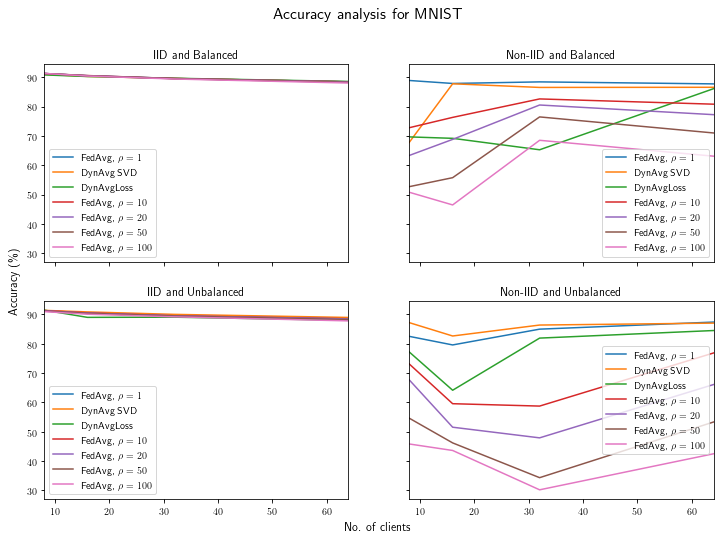

In [162]:
fig2, axes2 = plt.subplots(2, 2, figsize=(12, 8), sharey=True, sharex=True)
# add a big axes, hide frame
fig2.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

# IID and balanced
acc_ib_merged.plot(ax=axes2[0, 0])
axes2[0, 0].set_title('IID and Balanced')

# Non-IID and balanced
acc_nb_merged.plot(ax=axes2[0, 1])
axes2[0, 1].set_title('Non-IID and Balanced')

# IID and Unbalanced
acc_iu_merged.plot(ax=axes2[1, 0])
axes2[1, 0].set_title('IID and Unbalanced')
axes2[1, 0].set_xlabel('')

# Non-IID and Unbalanced
acc_nu_merged.plot(ax=axes2[1, 1])
axes2[1, 1].set_title('Non-IID and Unbalanced')
axes2[1, 1].set_xlabel('')

plt.ylabel('Accuracy (\%)', fontdict=dict(fontsize=12))
plt.xlabel('No. of clients', fontdict=dict(fontsize=12))
plt.suptitle(r'Accuracy analysis for MNIST', fontsize=16)
plt.savefig('../reports/figures/accuracy-analysis.png', dpi=500, format='png')

### Fashion-MNIST

In [145]:
f_mnist_fed = pd.read_csv("../data/output/fmnist-pkt-size.csv")
# mnist_avg = pd.read_csv("../data/output/mnist-avg.csv")
f_mnist_fed = f_mnist_fed.loc[~f_mnist_fed.isnull().any(axis=1)]

In [146]:
f_mnist_fed.head()

,N_WORKERS,COMM_PERIOD,AGG_MODE,COMM_MODE,NONIID,UNBALANCED,TIME,ACCURACY,PKT_SIZE
0,16,1,0,0,0,0,60.652477,82.33,44.968
1,16,1,0,0,0,1,72.326389,82.36,44.968
2,16,1,0,0,1,0,61.542717,77.62,44.968
3,16,1,0,0,1,1,56.026156,64.18,44.968
4,16,1,0,1,0,0,54.166555,82.18,23.353


In [114]:
# mnist_avg.head()

#### IID and balanced

##### Time

In [147]:
ib_query = 'NONIID == 0 and UNBALANCED == 0'
t_ib_merged_f = performance_pivot(f_mnist_fed, ib_query, 'TIME', columns=columns, xlabel=xlabel)
t_ib_merged_f

,"FedAvg, $\rho=1$",DynAvg SVD,DynAvgLoss,"FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
No. of clients,,,,,,,
8,81.111124,81.325586,81.135974,67.744885,67.732052,66.954560,66.059596
16,53.082782,51.162418,51.295309,40.937495,40.297121,39.178140,38.356057
32,38.489606,41.562262,39.060068,26.693646,23.979646,23.163294,22.724875
64,38.222111,33.519644,39.421713,17.865979,16.344227,15.514344,17.175292


##### Accuracy

In [148]:
acc_ib_merged_f = performance_pivot(f_mnist_fed, ib_query, 'ACCURACY', columns=columns, xlabel=xlabel)
acc_ib_merged_f

,"FedAvg, $\rho=1$",DynAvg SVD,DynAvgLoss,"FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
No. of clients,,,,,,,
8,83.30,83.11,83.04,83.30,83.28,83.26,83.20
16,82.33,82.11,81.98,82.32,82.30,82.26,82.27
32,80.95,80.69,80.72,80.94,80.93,80.89,80.87
64,79.16,78.85,79.20,79.15,79.12,79.10,78.73


#### Non-IID and Balanced

In [149]:
nb_query = 'NONIID == 1 and UNBALANCED == 0'

###### Time

In [150]:
t_nb_merged_f = performance_pivot(f_mnist_fed, nb_query, 'TIME', columns=columns, xlabel=xlabel)
t_nb_merged_f

,"FedAvg, $\rho=1$",DynAvg SVD,DynAvgLoss,"FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
No. of clients,,,,,,,
8,81.112233,79.875899,81.935009,67.134549,66.715260,67.540859,66.455516
16,59.055749,51.455582,52.290528,40.042556,39.036174,39.271614,39.052783
32,37.639466,38.846707,42.370467,28.090327,25.139071,24.147564,23.042122
64,38.670038,34.159706,30.910865,17.650809,16.129778,15.280797,31.779874


##### Accuracy

In [151]:
acc_nb_merged_f = performance_pivot(f_mnist_fed, nb_query, 'ACCURACY', columns=columns, xlabel=xlabel)
acc_nb_merged_f

,"FedAvg, $\rho=1$",DynAvg SVD,DynAvgLoss,"FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
No. of clients,,,,,,,
8,72.88,60.87,33.82,52.75,48.48,45.95,43.15
16,77.62,68.29,46.05,57.51,46.48,37.38,32.99
32,77.67,72.11,54.55,58.86,47.47,38.02,32.90
64,76.69,68.18,63.57,54.67,42.21,30.52,26.53


#### Non-IID and Unbalanced

##### Time

In [152]:
nu_query = 'NONIID == 1 and UNBALANCED == 1'

In [153]:
t_nu_merged_f = performance_pivot(f_mnist_fed, nu_query, 'TIME', columns=columns, xlabel=xlabel)
t_nu_merged_f

,"FedAvg, $\rho=1$",DynAvg SVD,DynAvgLoss,"FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
No. of clients,,,,,,,
8,83.298596,81.037678,79.068699,65.759144,64.786448,63.758009,63.779532
16,55.599540,59.154113,57.925528,42.078619,35.859849,41.832592,37.741383
32,50.707368,41.032156,36.464281,37.935009,25.403876,24.520103,27.901138
64,48.709202,34.585355,35.828036,19.040363,22.345302,18.181818,17.731668


##### Accuracy

In [154]:
acc_nu_merged_f = performance_pivot(f_mnist_fed, nu_query, 'ACCURACY', columns=columns, xlabel=xlabel)
acc_nu_merged_f

,"FedAvg, $\rho=1$",DynAvg SVD,DynAvgLoss,"FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
No. of clients,,,,,,,
8,67.79,69.35,43.86,55.08,44.81,29.61,25.06
16,64.18,64.42,50.12,43.82,39.73,26.24,23.00
32,64.35,61.19,59.24,40.33,35.16,30.67,22.30
64,71.52,67.88,61.96,40.60,30.03,19.92,19.75


#### IID and Unbalanced

##### Time

In [155]:
iu_query = 'NONIID == 0 and UNBALANCED == 1'

In [156]:
t_iu_merged_f = performance_pivot(f_mnist_fed, iu_query, 'TIME', columns=columns, xlabel=xlabel)
t_iu_merged_f

,"FedAvg, $\rho=1$",DynAvg SVD,DynAvgLoss,"FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
No. of clients,,,,,,,
8,84.121199,78.973186,79.630816,65.448938,65.103688,63.690424,63.281691
16,74.097981,64.204691,52.238587,37.839352,46.045176,46.720171,42.392884
32,59.431855,46.946655,42.179990,27.506687,26.478805,27.596854,25.413807
64,49.497367,42.190504,41.841849,18.981853,16.253321,19.169949,16.559473


##### Accuracy

In [157]:
acc_iu_merged_f = performance_pivot(f_mnist_fed, iu_query, 'ACCURACY', columns=columns, xlabel=xlabel)
acc_iu_merged_f

,"FedAvg, $\rho=1$",DynAvg SVD,DynAvgLoss,"FedAvg, $\rho=10$","FedAvg, $\rho=20$","FedAvg, $\rho=50$","FedAvg, $\rho=100$"
No. of clients,,,,,,,
8,83.31,83.41,83.60,83.28,83.21,83.11,83.03
16,82.36,82.84,81.08,82.38,82.29,82.11,81.79
32,80.95,81.67,80.58,80.96,80.94,80.80,80.32
64,79.37,80.44,78.65,79.29,79.20,78.99,78.47


### Wall time analysis

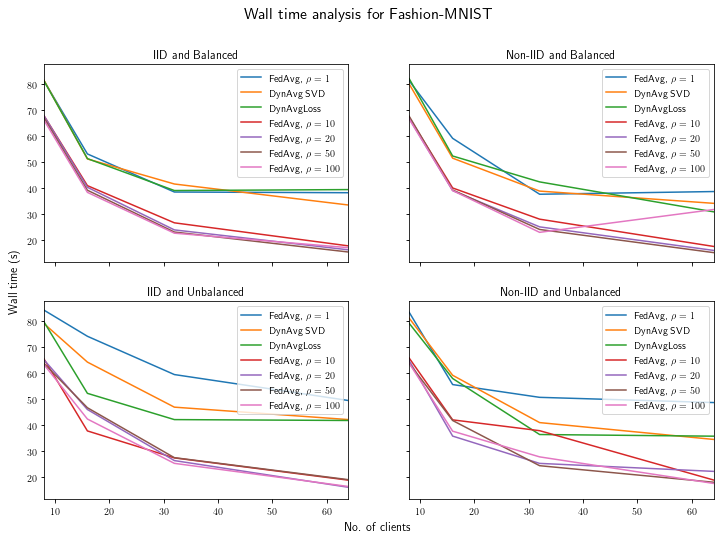

In [159]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True, sharex=True)
# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# IID and Balanced
t_ib_merged_f.plot(ax=axes[0, 0])
# axes[0, 0].set_ylabel('Wall time (s)', fontdict=dict(fontsize=12))
axes[0, 0].set_title('IID and Balanced')

# Non IID and Balanced
t_nb_merged_f.plot(ax=axes[0, 1])
axes[0, 1].set_title('Non-IID and Balanced')

# IID and Unbalanced
t_iu_merged_f.plot(ax=axes[1, 0])
axes[1, 0].set_title('IID and Unbalanced')
axes[1, 0].set_xlabel('')

# Non IID and Unbalanced
t_nu_merged_f.plot(ax=axes[1, 1])
axes[1, 1].set_title('Non-IID and Unbalanced')
axes[1, 1].set_xlabel('')

plt.ylabel('Wall time (s)', fontdict=dict(fontsize=12))
plt.xlabel('No. of clients', fontdict=dict(fontsize=12))
plt.suptitle('Wall time analysis for Fashion-MNIST', fontsize=16)
plt.savefig('../reports/figures/time-analysis-fmnist.png', dpi=500, format='png')

### Accuracy analysis

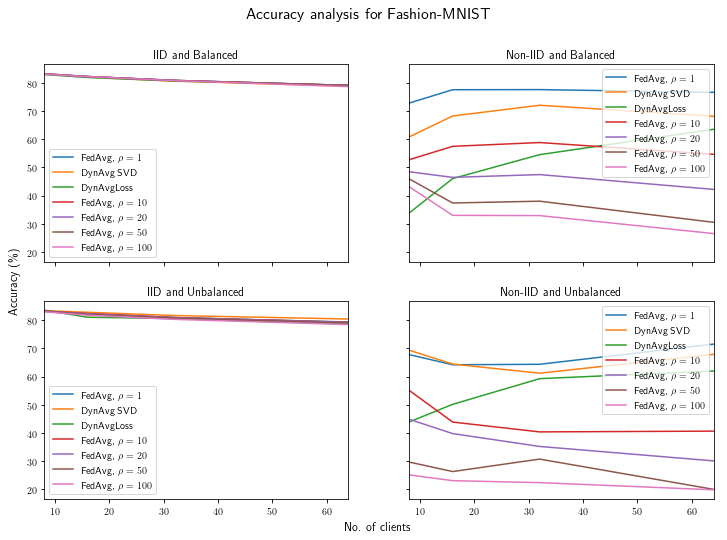

In [161]:
fig2, axes2 = plt.subplots(2, 2, figsize=(12, 8), sharey=True, sharex=True)
# add a big axes, hide frame
fig2.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

# IID and balanced
acc_ib_merged_f.plot(ax=axes2[0, 0])
axes2[0, 0].set_title('IID and Balanced')

# Non-IID and balanced
acc_nb_merged_f.plot(ax=axes2[0, 1])
axes2[0, 1].set_title('Non-IID and Balanced')

# IID and Unbalanced
acc_iu_merged_f.plot(ax=axes2[1, 0])
axes2[1, 0].set_title('IID and Unbalanced')
axes2[1, 0].set_xlabel('')

# Non-IID and Unbalanced
acc_nu_merged_f.plot(ax=axes2[1, 1])
axes2[1, 1].set_title('Non-IID and Unbalanced')
axes2[1, 1].set_xlabel('')

plt.ylabel('Accuracy (\%)', fontdict=dict(fontsize=12))
plt.xlabel('No. of clients', fontdict=dict(fontsize=12))
plt.suptitle(r'Accuracy analysis for Fashion-MNIST', fontsize=16)
plt.savefig('../reports/figures/accuracy-analysis-fashion-mnist.png', dpi=500, format='png')